# Introduction to Data Science
## Homework 5

Student Name: Ruofan Wang

Student Netid: rw2268
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Answer here!

I think Laplace smoothing is useful when there is a $\text{count}(e_i, c)$ is 0, which means that there is a word in the test documents which doesn't appear in any training document. If we do not use the Laplace smoothing, the probability will be zero, which does not make any sense. SO we can use Laplace smoothing to avoid these situations. It will increase bias and reduce the variance of our model to make it more robust.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [1]:
import pandas as pd
data = pd.read_csv("imdb.csv")
data = data.dropna()
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [2]:
# Code here
data['Class'] = data.apply(lambda x : 1 if x["Class"] == "P" else 0, axis = 1)
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [3]:
from sklearn.cross_validation import train_test_split

X = pd.DataFrame(data['Text'])
Y = pd.DataFrame(data['Class'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75)

/Users/wangruofan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
Y_train.head()

,Class
3142,1
2448,1
1452,1
6021,0
944,0


4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

binary_vec = CountVectorizer(binary=True,stop_words='english',ngram_range=(1,2))
X_train_binary = binary_vec.fit_transform(X_train['Text'])
X_test_binary = binary_vec.transform(X_test['Text'])

tfidf_vec = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
X_train_tfidf = tfidf_vec.fit_transform(X_train['Text'])
X_test_tfidf = tfidf_vec.transform(X_test['Text'])


In [6]:
print(X_test_tfidf)

  (0, 571594)	0.0727838008774
  (0, 571407)	0.0331541167762
  (0, 571321)	0.0747764190454
  (0, 571291)	0.0436213559144
  (0, 569958)	0.0348202844193
  (0, 569237)	0.0260617154277
  (0, 567990)	0.0727838008774
  (0, 567755)	0.0329661149028
  (0, 564026)	0.0282569624324
  (0, 563887)	0.0747764190454
  (0, 563760)	0.0363120371595
  (0, 562565)	0.0263822305857
  (0, 561592)	0.0360746873957
  (0, 560401)	0.0356181146461
  (0, 555269)	0.0467772108972
  (0, 547924)	0.0314141435054
  (0, 547470)	0.0675350075313
  (0, 547467)	0.0595534291791
  (0, 547266)	0.0773453506626
  (0, 545857)	0.0697791848455
  (0, 545597)	0.0271673158856
  (0, 541485)	0.0531631146148
  (0, 535686)	0.0408335879567
  (0, 525781)	0.0773453506626
  (0, 525670)	0.0363723735995
  :	:
  (2124, 320770)	0.169058378899
  (2124, 313782)	0.159309763759
  (2124, 301954)	0.0725279150671
  (2124, 279690)	0.173686727422
  (2124, 253296)	0.111038360591
  (2124, 228959)	0.120090550508
  (2124, 209784)	0.0790690457961
  (2124, 195337)	0

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [7]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12


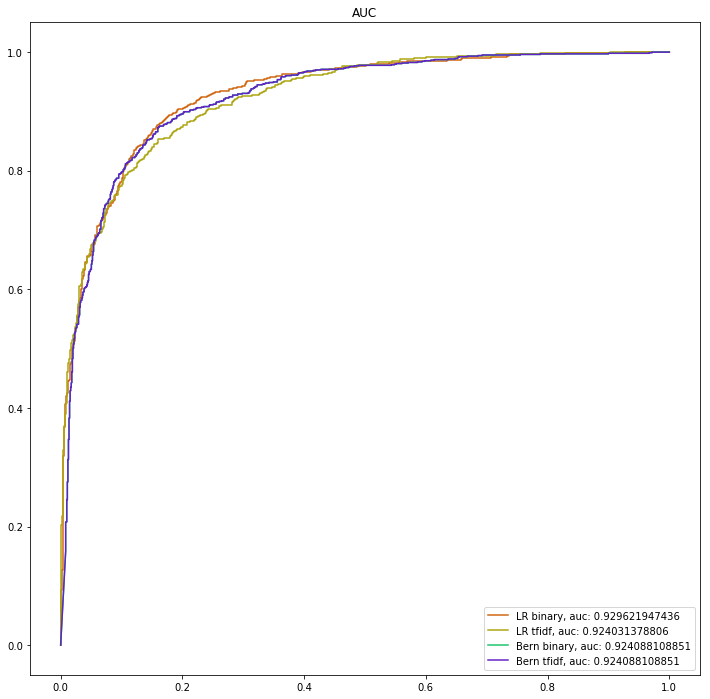

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import numpy as np
plt.title("AUC")
data = [(X_train_binary, X_test_binary, 'binary'), (X_train_tfidf, X_test_tfidf, 'tfidf')]
lg = LogisticRegression()
for xtrain, xtest, label in data:
    lg.fit(xtrain, Y_train['Class'])
    y_hat = lg.predict_proba(xtest)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test['Class'], y_hat)
    score = metrics.roc_auc_score(Y_test['Class'], y_hat)
    randc = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=randc, label="LR " + label + ", auc: "+ str(score))
ber = BernoulliNB()
for xtrain, xtest, label in data:
    ber.fit(xtrain, Y_train['Class'])
    y_hat = ber.predict_proba(xtest)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test['Class'], y_hat)
    score = metrics.roc_auc_score(Y_test['Class'], y_hat)
    randc = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=randc, label="Bern " + label + ", auc: "+ str(score))
    
plt.legend()
plt.show()
# Code here

Explanation here!

<ol>
    <li> I think Logistic Regression performs better. According to the graph, LR on binary sets obtains the highest AUC score. The BernoulliNB is not that good, because it assumes that all variables are independent. But it is obvious that the words cannot independently appear.<hr>
    <li> The BernoulliNB on binary sets and tfidf sets are identical. Because the target variable is binary. And the BernoulliNB will treat every none-zero number in tfidf as 1, which yields the same result as binary sets. 
    
</ol>

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [9]:
# Code here to display 5 incorrect reviews.

lr = LogisticRegression()
lr.fit(X_train_binary, Y_train['Class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
yhat = lr.predict(X_test_binary)
count = 0
for i in range(len(yhat)):
    if Y_test.iloc[i,0] == 1 and yhat[i] == 0:
        print(X_test.iloc[i].values[0])
        print("\n")
        count = count + 1
    if count >= 5 :
        break

'There seems to be only two types of reviews of this film on the net. Those who hate it and curse Ralph Bakshis name and those love it and call it work of genious. Im inclined to be in the middle. Iam forced to agree with most of the criticisms of this film (e.g.the cruel cutting of the story badly rotoscoped charecters over acting etc...) But dispite this I still love this film. The rotoscoping (when done properly)adds an eerie lifelike dimension to the charecters and the final battle scene at the end of the film is fantastic. The surrealistic scenes when the nineriders chase Frodo are stylish and well executed and the musical score... magic. Sadly the bad points outweight film but if you can bring yourself to ignore them it is a great film. (No doubt Ill be lynched by an angry mob of people who hate this film after writing this review ah well such is life)'


'Shot into car from through the windscreen someone is playing someone else their latest song someone else didnt react accordin

Explanation for the 5 reviews chosen here!

<ol>
    <li>For the first one, I think the author spends too much on negative reviews of this film. He quotes some bad reviews containing some negative words. So it will be classified as a negative review.
    <li>For the second one, I think it is sort of difficult to understand the author's meaning just according to the words, since most of them are neutral words, so it can make the classifier confused.
    <li>For the third one, I think the author talks too much about his views about the director's experience. And he uses so many negative words like "embarrassed", "disappointing", which may mislead the classifier.
    <li>For the fourth one, I think the author quotes others' negative reviews containing so many bad words like "dull". And although he likes this movie, he also mentions some of the drawbacks of it, I think that is another reason.
    <li>For the fifth one, I think it also contains so many negative words, which can mislead the classifier. And he talks to much about the slots instead of his feelings.
    
</ol>